<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Repositories" data-toc-modified-id="Repositories-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Repositories</a></span></li><li><span><a href="#Status" data-toc-modified-id="Status-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Status</a></span></li><li><span><a href="#Repositories" data-toc-modified-id="Repositories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Repositories</a></span><ul class="toc-item"><li><span><a href="#Remove-repositories-that-we-lost-access-without-a-backup" data-toc-modified-id="Remove-repositories-that-we-lost-access-without-a-backup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Remove repositories that we lost access without a backup</a></span><ul class="toc-item"><li><span><a href="#Repositories-with-no-notebooks" data-toc-modified-id="Repositories-with-no-notebooks-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Repositories with no notebooks</a></span></li><li><span><a href="#Valid-repositories" data-toc-modified-id="Valid-repositories-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Valid repositories</a></span></li></ul></li><li><span><a href="#Notebook-count" data-toc-modified-id="Notebook-count-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Notebook count</a></span></li><li><span><a href="#Repository-count" data-toc-modified-id="Repository-count-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Repository count</a></span><ul class="toc-item"><li><span><a href="#Repositories-with-only-1-notebook" data-toc-modified-id="Repositories-with-only-1-notebook-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Repositories with only 1 notebook</a></span></li><li><span><a href="#Repositories-with-only-2-notebook" data-toc-modified-id="Repositories-with-only-2-notebook-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Repositories with only 2 notebook</a></span></li><li><span><a href="#Repositories-with-10-or-more-notebooks" data-toc-modified-id="Repositories-with-10-or-more-notebooks-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Repositories with 10 or more notebooks</a></span></li><li><span><a href="#Notebooks-that-belong-to-repositories-with-10-or-more-notebooks" data-toc-modified-id="Notebooks-that-belong-to-repositories-with-10-or-more-notebooks-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Notebooks that belong to repositories with 10 or more notebooks</a></span></li></ul></li><li><span><a href="#Repositories-with-requirements.txt-or-setup.py" data-toc-modified-id="Repositories-with-requirements.txt-or-setup.py-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Repositories with requirements.txt or setup.py</a></span></li><li><span><a href="#Notebooks-in-repositories-with-requirements.py-or-setup.py-or-Pipfile" data-toc-modified-id="Notebooks-in-repositories-with-requirements.py-or-setup.py-or-Pipfile-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Notebooks in repositories with requirements.py or setup.py or Pipfile</a></span></li></ul></li></ul></div>

# Repositories

Analyze repositories: number of notebooks/repository, and repoositories with dependency files (setup.py, requirements.txt, Pipfile)

In [1]:
import sys
sys.path.insert(0, '../archaeology')
sys.path.insert(0, '../analysis')

import os

import seaborn as sns
import pandas as pd


from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib.ticker import NullLocator

from consts import R_STATUSES
from config import DB_CONNECTION
from db import connect, Repository, Query
import analysis_helpers, importlib
importlib.reload(analysis_helpers)
from analysis_helpers import describe_processed
from analysis_helpers import distribution_with_boxplot, savefig
from analysis_helpers import var, relative_var

%matplotlib inline

In [2]:
with connect() as session:
    #print('Last query:', session.query(Query).all()[-1])
    repositories = pd.read_sql_table('repositories', session.connection())

# Status

In [3]:
series = repositories.groupby("processed").size()
#series
#series.plot(kind="bar")

,0
notebooks and cells - ok,2177
compress - ok,2177
requirements - ok,2177
compress - fail,276
extracted files,1897


<AxesSubplot:>

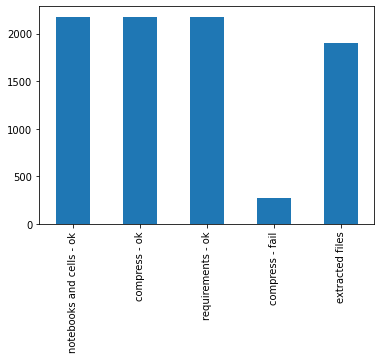

In [4]:
described = describe_processed(series, R_STATUSES, True)
display(described.to_frame())
described.plot(kind="bar")

# Repositories

## Remove repositories that we lost access without a backup

In [5]:
repositories = repositories[
    (repositories["processed"] & 1024 == 0) # failed to clone
] 

### Repositories with no notebooks
They matched the query 'language:"Jupyter Notebook"', but they did not have a notebook.
Or they had only in checkpoint folders

In [6]:
len(repositories[repositories["notebooks_count"] == 0])

1060

### Valid repositories

In [7]:
repositories = repositories[repositories["notebooks_count"] > 0]
print('Repositories: {}'.format(var("repositories", len(repositories), "{:,}")))

Repositories: 1,117


In [8]:
repositories.head(5)

,id,article_id,domain,repository,hash_dir1,hash_dir2,commit,notebooks_count,setups_count,requirements_count,notebooks,setups,requirements,processed,pipfiles_count,pipfile_locks_count,pipfiles,pipfile_locks
0,1,1,github.com,chfc-cmi/misas,fb,72c1f535128c3590fbc4947125801710adfc1e,a67e0dbc7c7dbb078f7624fc790564bb6d929b71,8,1,0,07_myops.ipynb;06_pneumothorax.ipynb;index.ipy...,setup.py,,8329,0,0,,
6,7,2,github.com,labtanaka/meyer_lungfish,d2,d2bcab98f1237068be357125d1b5d5f6144f7b,3b89ce209359dc09aa232bde2954e1b451edc935,5,0,0,jupyter/Lungfish_MARVEL_benchmark.ipynb;jupyte...,,,8329,0,0,,
7,8,3,github.com,malikaratnayake/HyDaT_Tracker,18,43ddb12099c0d0fc077ea91ba55a1b7f257c73,06784ad02d88129f4f3928ecfea0ac2b7f81903e,3,0,1,HyDaT_Tracker.ipynb;LambsEar_analysis.ipynb;Sc...,,requirements.txt,8329,0,0,,
8,9,3,github.com,deep-diver/Soccer-Ball-Detection-YOLOv2,fd,b3197d5847ee1df39a60baa37e84f8cc215e46,16ab2f2141731a5e1c7e72c68eb4cb7888e9a6a3,1,0,0,YOLOv2-Train.ipynb,,,8329,0,0,,
11,12,4,github.com,KaliLab/HippoUnit_demo,73,7b17e4a2808ce4184486e0ea7046981c3affdc,3062b8fdbbec688ce082e0cb7c9de4b1d57120b9,12,0,0,jupyter_notebooks/Gomez_Gonzalez_2011_n123_mor...,,,141,0,0,,


## Notebook count

In [9]:
total_notebooks = repositories["notebooks_count"].sum()
'{:,}'.format(total_notebooks)

'9,625'

Distribution(min=1, q1=1.0, median=4.0, q3=9.0, max=294)


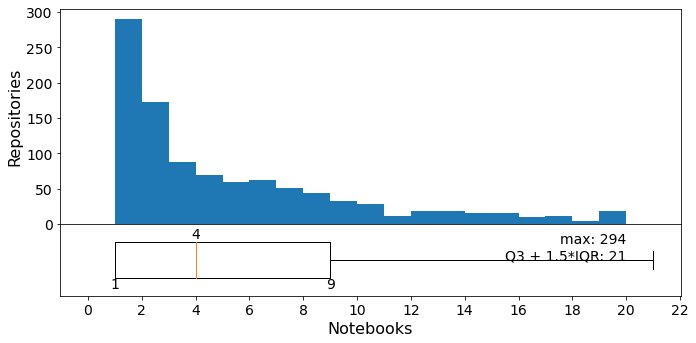

In [10]:
column = repositories["notebooks_count"]
with savefig("notebooks_count", 9, 5):
    distribution = distribution_with_boxplot(column, 0, 20, 2, "Repositories", "Notebooks",  True)
    print(distribution)

## Repository count

In [11]:
total = len(repositories)
total

1117

### Repositories with only 1 notebook

In [12]:
relative_var(
    "repositories_1_notebook", 
    len(repositories[repositories["notebooks_count"] == 1]),
    total,
)

'290 (25.96%)'

### Repositories with only 2 notebook

In [13]:
relative_var(
    "repositories_2_notebooks", 
    len(repositories[repositories["notebooks_count"] <= 2]),
    total,
)

'462 (41.36%)'

### Repositories with 10 or more notebooks

In [14]:
repo_10_plus = repositories[repositories["notebooks_count"] >= 10]
relative_var(
    "repositories_10_notebooks",
    len(repo_10_plus),
    total,
)

'249 (22.29%)'

### Notebooks that belong to repositories with 10 or more notebooks

In [15]:
notebooks_in_repo_10_plus = repo_10_plus["notebooks_count"].sum()
relative_var(
    "notebooks_from_repositories_10",
    notebooks_in_repo_10_plus,
    total_notebooks,
)

'6,782 (70.46%)'

## Repositories with requirements.txt or setup.py

In [16]:
fn = lambda x: len(x)

setup_and_requirements_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_requirements = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements_and_pipfile = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
pipfiles = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
others = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])

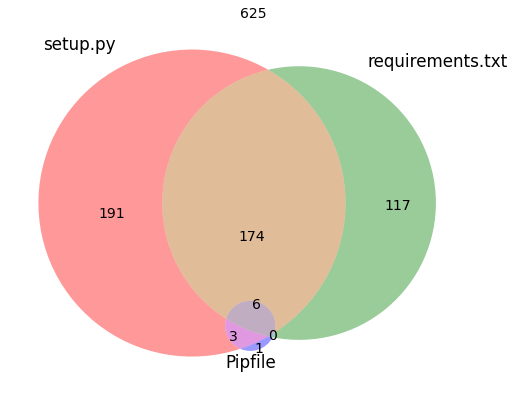

In [17]:

with savefig("repository_dependencies_x3", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn3(subsets={
        "111": setup_and_requirements_and_pipfile,
        "110": setup_and_requirements,
        "101": setup_and_pipfile,
        "100": setup,
        "011": requirements_and_pipfile,
        "010": requirements,
        "001": pipfiles
    }, set_labels=('setup.py', 'requirements.txt', 'Pipfile'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.6, "{0:,g}".format(others))
    plt.tight_layout()
    plt.plot();
    

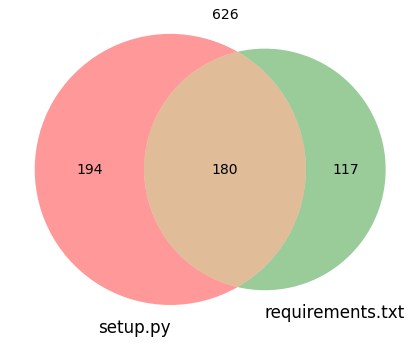

In [18]:
with savefig("repository_dependencies_x2", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn2(subsets={
        "11": setup_and_requirements + setup_and_requirements_and_pipfile,
        "10": setup + setup_and_pipfile,
        "01": requirements + requirements_and_pipfile,
    }, set_labels=('setup.py', 'requirements.txt'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.55, "{0:,g}".format(others + pipfiles))
    ax.set_axis_off()
    #plt.subplots_adjust(top = 0.9, bottom = 0, right = 1, left = 0, 
    #        hspace = 0, wspace = 0)
    ax.margins(0,0)
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    plt.plot();


In [19]:
pipfile_total = setup_and_requirements_and_pipfile + setup_and_pipfile + requirements_and_pipfile + pipfiles
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print("Repositories with Pipfile: {}".format(
    relative_var("repositories_with_pipfile", pipfile_total, len(repositories))
))
print("Repositories with Declared Modules: {}".format(
    relative_var("repositories_with_dependencies", dependencies, dependencies + others)
))

Repositories with Pipfile: 10 (0.90%)
Repositories with Declared Modules: 492 (44.05%)


## Notebooks in repositories with requirements.py or setup.py or Pipfile

In [20]:
fn = lambda x: x["notebooks_count"].sum()

setup_and_requirements_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_requirements = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements_and_pipfile = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
pipfiles = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
others = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])


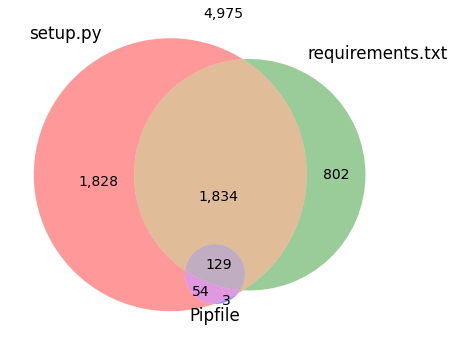

In [21]:
with savefig("notebook_dependencies_x3", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn3(subsets={
        "111": setup_and_requirements_and_pipfile,
        "110": setup_and_requirements,
        "101": setup_and_pipfile,
        "100": setup,
        "011": requirements_and_pipfile,
        "010": requirements,
        "001": pipfiles
    }, set_labels=('setup.py', 'requirements.txt', 'Pipfile'), ax=ax)
    for label in venn.subset_labels:
        if label:
            label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.6, "{0:,}".format(others))
    plt.plot()

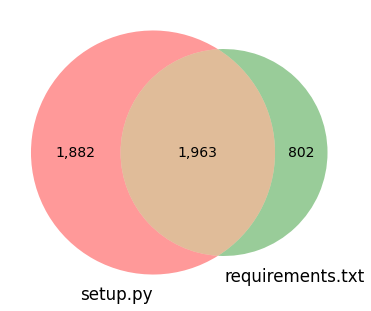

In [22]:
with savefig("notebook_dependencies_x2", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn2(subsets={
        "11": setup_and_requirements + setup_and_requirements_and_pipfile,
        "10": setup + setup_and_pipfile,
        "01": requirements + requirements_and_pipfile,
    }, set_labels=('setup.py', 'requirements.txt'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    #ax.text(0, 0.6, "{0:,}".format(others + pipfiles))
    plt.subplots_adjust(top=0.8, right=0.8)
    plt.plot();



In [23]:
pipfile_total = setup_and_requirements_and_pipfile + setup_and_pipfile + requirements_and_pipfile + pipfiles
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print("Notebooks in repositories with Pipfile: {}".format(
    relative_var("notebooks_with_pipfile", pipfile_total, total_notebooks)
))
print("Notebooks in repositories with Declared Modules: {}".format(
    relative_var("notebooks_with_dependencies", dependencies, dependencies + others),    
))

Notebooks in repositories with Pipfile: 186 (1.93%)
Notebooks in repositories with Declared Modules: 4,650 (48.31%)
